# A Basic Work Flow of Machine Learning in Python

*Xianjun Geng, Fall 2021*

We will together walk through a very basic supervised learning process using the Python programming language. 

Important: This lecture is prepared for students who are *already* experienced with predictive analytics using R. 

## Background: what is machine learning?

Simply put, machine learning (ML) attempts to learn **patterns** -- a.k.a. things that repeat themselves -- from past data. *The repetition nature of a found pattern gives us hope that the pattern will again repeat itself in the future*, thus we can use machine learning to *predict*.

We discover patterns using a wide range of mathematical models, a.k.a. **learning algorithms**, that researchers from many domains such as mathematics, computer science, statistics and the business world invented. 
+ This also explains why we have many names for (largely) the same thing, e.g., data science, KDD (Knowledge Discovery in Databases), machine learning, predictive inference, business intelligence, business analytics. 

There are three main caterories of machine learning: 
+ **supervised learning** (this is what we'll mainly focus on in this course)
+ **unsupervised learning** (when data has inputs but no output, examples include clustering, anomaly/outlier detection, association rules ...)
+ **reenforcement learning** (Not required for this course. See [this excellent short article](https://www.kdnuggets.com/2018/03/5-things-reinforcement-learning.html) if interested. Famous for beating human pros in board/poker games, e.g. [AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far) and [ReBel](https://ai.facebook.com/blog/rebel-a-general-game-playing-ai-bot-that-excels-at-poker-and-more/).)  

### Supervised learning

Also called **predictive analytics**, supervised learning tries to build a **function** (a.k.a. an **algorithm**) that *maps a set of inputs to an output using past data of inputs-output pairs*. We assume that this found algorithm/function holds for both past and future data, and thus we can apply this function to future inputs to *predict* the corresponding future output.
 
![Spam filter](image_spam_filter.png)

Many names for inputs and output:
+ inputs are also called: predictors, independent variables, **features**, input columns, (in Scikit-Learn) X
+ output is also called: prediction, dependent variable, label, **target**, output column, (in Scikit-Learn) y
  + guess what "labeled data" means?

Supervised learning algorithms include **classification** for categorical output and **regression** for continuous output. 

Note the difference between "learning algorithm" and "algorithm":
+ "algorithm" is the function we discover that maps inputs to output
+ "learning algorithm" is what we use, along with the data input, to build an algorithm
+ For example, "logistic regression" is a learning algorithm. After training it with data, the specific formula with all coefficient values determined is an algorithm

The general work flow of supervised learning, as you've already experienced in your Modeling and Analytics course, and as we discussed in the first lecture of this course, involves five steps as follows:

![Work Flow of Supervised Learning](image_BALifeCycle.png)


We next walk through these five steps of supervised learning using the Python programming language.



## Step 1\. Data gathering ~~and wrangling~~

The dataset we use is the **Lending Club** dataset. Refer to file "LendingClub_description.pdf" for details.

As a very basic code, we won't get into data wrangling yet today. (We don't even know what to wrangle with rive".

### Load the LendingClub dataset

In [4]:
# Import Python packages as follows. This is analogous to library() in R.
import numpy as np
import pandas as pd
# These two packages, NumPy and pandas, together allow us to manipulate data efficiently.
# We'll study and use these two must-have data-science packages in the next few weeks. 


In [ ]:
#df2 = pd.read_csv()  #click "tab" after pd.

In [5]:
# Load the Lending Club dataset. Analogous to read.csv() in R.
# In pandas, a data table is called a DataFrame. Thus we often use "df" to denote a data table.
df = pd.read_csv('LendingClub.csv')

In [6]:
# Show on screen the first few records in this dataset. 
# Analogous to head() in R, yet now as a method of object "df".
df.head(10)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


### Data structure for supervised learning in Python

Similar to R, in Python we usually expect data in a **table format** for predictive analytics, as shown above.
+ each row is a **sample**/record, e.g. a customer
+ each column is an input "independent variable"/attribute/**feature**/predictor, e.g., FICO score of a customer
  + with the exception of one column being the output **target**/label /prediction/"dependent variable", e.g., "not_fully_paid" in the above dataset

Different from R, in Python we usually expect the inputs and output to be stored *separately* as follows.



In [16]:
# Separate the dataset into a features matrix X and a target array y
X = df.drop(columns=['not_fully_paid'])
y = df['not_fully_paid']

**Features matrix** (a.k.a. the inputs)

The features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy `array` or a Pandas `DataFrame`. 

**Target array** (a.k.a. the output)

In addition to the feature matrix `X`, we also work with a *target array* (or called *label array*) for supervised learning. By convention we call this array `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy `array` or Pandas `Series`. Values in the target array can be either continuous or discrete. The target array is what we want to *predict from the data*, such as whether a customer will default on a loan.

### Data wrangling

Is data wrangling important in real life? ***Absolutely yes.***

Are we doing data wrangling today? Bravely no :) .

## Step 2\. Exploratory data analysis (EDA)

*In the real world, EDA and related data wrangling will likely take most of your time.* For today only, let's keep EDA to a bare minimum.

In [7]:
# How large is the dataset?
df.shape
# Analogous to dim() in R.

(9578, 14)

In [8]:
df.describe()  #similar with summarize() in R

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
# Any missing data?
df.isnull().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [10]:
# Summary statistics of each numerical column. Analogous to summary() in R.
df.describe().loc[['mean','std']]

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,16913.963876,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,33756.189557,29.014417,2.200245,0.546215,0.262126,0.366676


<AxesSubplot:>

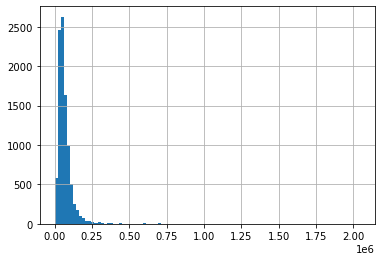

In [11]:
# Let's plot a histogram of annual income:
np.exp(df.log_annual_inc).hist(bins=100)

Professor Geng thinks, *bravely*, that this dataset looks ready for predictive modeling. Geng thinks that no more EDA or data wrangling is needed. Let's assume Geng is right, and move on.

## Step 3\. Modeling

Most traditional machine learning algorithms (as compared to deep learning) in Python are nicely bundled into the awesome **scikit-learn** package (we'll study this package more later in the semester). 
+ If anyone asks me why Python over R, scikit-learn is my top reason
+ In Python coding this package is named `sklearn`

### Partition the data

This is done using the `train_test_split()` function in the `sklearn` package:

In [13]:
from sklearn.model_selection import train_test_split

In [22]:
# reserve 20% dataset as testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Choose the learning algorithm

The scikit-learn package offers numerous classification and regression learning algorithms, many of which are state-of-the-art choices. You can find them at (https://scikit-learn.org/stable/supervised_learning.html) -- this will be a topic of later weeks.

As the target `not_fully_paid` is discrete: 1 for not fully paid, and 0 for fully paid, the Lending Club problem is a ***classification*** problem.
+ Unlike R, there's no "factor" data type in Python. 
+ If the target is integer, it is assumed to be a classification problem. If the target is float, a regression problem.

Let's try the ***logistic regression*** that we've learned last semester.
+ Analogous to glm(..., family="binomial") or train(..., method="glm", family="binomial") in R.

(NOT required for today) scikit-learn is famous for providing high-quality documentations. For example, for logistic regression:
+ You can find detailed explanation of the underlying statistical concepts at (https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) 
+ You can find detailed coding definitions and examples at (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [23]:
from sklearn.linear_model import LogisticRegression

Since logistic regression cannot handle string data, let us drop column 'purpose' (but is this the proper way to handle?):

In [24]:
X_train = X_train.drop(columns=['purpose'])
X_test = X_test.drop(columns=['purpose'])

### Choose model hyperparameters

Most learning algorithms, including `LogisticRegression` implemented in `sklearn`, have many parameters that need to be explicitly set before we can run them. They are referred to as **hyperparameters**. Often, how we choose the values of these hyperparameters -- called **hyperparameter tuning** -- will affect the performance of the eventual trained model.

Example: The first hyperparameter of `LogisticRegression` is `penalty`. Our choice of its value will affect how complicated the trained algorithm is -- for example, how many features are eventually selected.

For today, we'll ignore hyperparameter tuning, and blindly follow Geng's choice below: 

In [25]:
model = LogisticRegression(random_state=0)

### Fit your model (a.k.a. train your model)

Now let's fit/train our model. That is, plugging our Lending Club dataset into the chosen learning algorithm in order to generate a trained model (and pray it's good).

In [26]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [28]:
# Run this code cell to see the coefficients of the trained model:
logit_reg_coef = pd.DataFrame(model.coef_[0],index=X_train.columns,columns=['coefficient'])
logit_reg_coef.transpose()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
coefficient,-0.000172,0.000012,0.000728,0.000062,0.000559,-0.002984,-0.000031,0.000002,0.005599,0.001004,0.00002,0.000036


Comment: In glm() in R, specifying the learning algorithm, specifying the hyperparameters, and training are all done in a single line of code. In scikit-learn, however, these are three separate steps.

One weakness of the scikit-learn package, as compared to R packages, is that it is more into prediction and less into the completeness of stats reporting. For example, `LogisticRegression` does not report the p-value. If you need it, try another package `statsmodels` as follows:
```
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())
```

In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.413661
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 7662
Model:                          Logit   Df Residuals:                     7650
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Feb 2022   Pseudo R-squ.:                 0.05169
Time:                        16:16:58   Log-Likelihood:                -3169.5
converged:                       True   LL-Null:                       -3342.2
Covariance Type:            nonrobust   LLR p-value:                 2.149e-67
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
credit_policy        -0.4240      0.093     -4.573      0.000      -0.606      -0.242
int_rate

## Step 4\. Evaluation

Now it's time to see how well our trained algorithm performs. First, we apply the trained model to the testing data `X_test` to get predictions. This is done using the `predict()` method.

In [29]:
y_predict = model.predict(X_test)

In [38]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Second, we compare the predicted values in `y_predict` with the true values we already have in `y_test` using the `accuracy_score()` function:

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict).round(4)

0.8314

Does the accuracy of our trained model, as shown above, appear okay to you?

Hint: try `1-y_test.mean()`, and think.

In [32]:
1-y_test.mean()

0.831419624217119

Now let's take a look at the confusion matrix:

In [33]:
from sklearn.metrics import confusion_matrix
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

The confusion matrix is:
[[1593    0]
 [ 323    0]]


***Chances are, we will not stumble upon an ideal trained model in our first try! Or the first many tries!*** Machine learning is almost always a repetitive process of observing the results, asking why, and forming our ideas on what next we should try, accordingly going back to data wrangling and EDA and model adjustment, and see if our ideas help or not. And repeat again if needed. This will occupy a big chunk of our time in the next few weeks.

**So, what should we do next regarding this Lending Club analytics problem?**

## Step 5\. Deployment

Once we have a champion model that we are happy with, we move it to deployment: using this trained model to automatically predict new data coming in, a.k.a. **scoring new data**, and to dispatch these predictions to decision makers. 

This typically involves converting markdown files to code files (i.e., from .ipynb file to .py file), setting up proper input/output pipelines, and task automation (e.g., running it at 8am everyday automatically). (Not required) You can start from this nice [guide](https://medium.com/@thabo_65610/three-ways-to-automate-python-via-jupyter-notebook-d14aaa78de9).

Below we'll just do a simple prediction. As we don't have any new data. Let's use the first 5 records in the test dataset and pretend they are new loan applicants.

In [34]:
new_loan_applicants = X_test.iloc[0:5]
# Let's take a look at these "new" loan applicants:
new_loan_applicants

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
8261,0,0.1513,451.48,11.264464,29.28,717,3330.000000,61057,80.7,3,0,0
3431,1,0.1537,871.16,11.925142,23.85,677,6419.958333,40741,50.3,3,0,0
5482,1,0.1357,509.53,11.302204,0.81,752,4770.000000,981,1.1,7,1,0
3272,1,0.1284,188.27,10.308953,2.08,687,4139.958333,3859,38.6,3,0,0
4687,1,0.1496,519.68,11.407565,24.99,687,3509.958333,53896,96.8,0,0,0


In [35]:
# For each of these 5 new applicants, what is our prediction?
model.predict(new_loan_applicants)

array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
# For each of these 5 new applicants, how confident are we regarding these predictions?
model.predict_proba(new_loan_applicants)

array([[0.78630279, 0.21369721],
       [0.7670418 , 0.2329582 ],
       [0.88108278, 0.11891722],
       [0.85940257, 0.14059743],
       [0.75039664, 0.24960336]])

## In-Class Exercise: Adapt the code for the Titanic dataset

Now that you know the basic flow of supervised learning in Python, please try to modify the code so that it works on the Titanic dataset.
+ Make a copy first. Name the copy "titanic.ipynb", and work on this copy.
+ After each step, let's pause and discuss.

## Question: What are we missing, before we can claim to be pros in Python-based analytics?

### The ability to manipulate data freely using NumPy and pandas

Recall that we wanted to: convert "purpose" to dummies, take a log of all dollar values, (in the Titanic dataset) convert Sex from male/female to 1/0, fill in missing values for Age, ...  

**NumPy**: fast **array**-based computing
+ You've already learned the basics of NumPy in our datacamp.com assignment 1 "Introduction to Python". 
+ See file "NumPy.ipynb" in Canvas -- a quick review/reference of key capabilities in NumPy relevant to data science.

**pandas**: two data structures (**Series** and **DataFrame**), and a powerful set of tools for manipulating data (selecting, modifying, creating, grouping, merging, summarizing ...)
+ <font color=red>***datacamp.com assignment 2 "Data Manipulation with pandas" due by 6:30pm on 9/28/2021***</font>
  + You'll learn the basics of pandas in this assignment. It'll take you about 4 hours.
  + ***Important***: make sure to use the link I provided in Lecture 1, i.e. (https://www.datacamp.com/groups/shared_links/433df063012aaaf37a15e5f97103d8f330dd684394630caa9c9c9051557c502c), to get to this assignment. Otherwise, you may not have free assess to it, or I won't see your completion within datacamp.

### Be able to implement most traditional supervised learning algorithms using scikit-learn

Logistic regression? Check (sort of). What about decision tree? Random forest? SVM? Nearest Neighbors? ...

**scikit-learn** (https://scikit-learn.org/) is THE best-known Python library for traditional (a.k.a. non-deep) machine learning. Advantages of scikit-learn include:

- A [large selection](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) of machine learning algorithms
  - and efficient implementation (a.k.a. fast) via NumPy and SciPy
- A selection of metrics for measuring model performance
- Excellent online documentation with awesome examples
- A clean, uniform, and streamlined API. Once you learn how to code with one algorithm, switching to other algorithms is usually straightforward

We will use two week (or more) to play with scikit-learn, including both the learning algorithms and the metrics, and to think how to drive better results.

### Not just to get results. To get MEANINGFUL and BETTER results.

Are we happy with the logistic regression model we just built for the Lending Club dataset?

Thoughts on the **metrics**: the metrics need to be meaningful for the business problems we try to help with. 
+ In a loan business, what are the reasonable metrics?

Thoughts on the **learning algorithms** and related **data wrangling**: which learning algorithm to eventually choose? What hyperparameter values to set? What coresponding data wrangling should we try? 
+ Nowadays, these are largely empirical questions that we let computers try various alternatives, and then select the champion model.

Thoughts on the **state-of-the-art techniques**
+ Right now and for traditional learning, **boosting algorithms** are the king in terms of performance
    + but ...
+ **Deep learning**